# 23. 1로 만들기
[문제 링크](https://www.acmicpc.net/problem/1463)

In [ ]:
n = int(input())
answer = 0
# 3으로 나눌수 있을 때까지 나누기
while True:
    if n % 3 != 0:
        break
    n = n // 3
    answer += 1
# 2로 나눌수 있을 때까지 나누기
while True:
    if n % 2 != 0:
        break
    n = n // 2
    answer += 1
# 1로 만들기
answer += n - 1
print(answer)

## 실패
- 문제 이해를 잘못함.

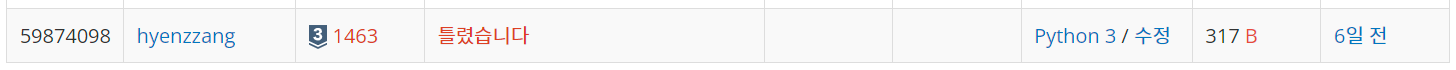

In [1]:
n = int(input())

# 동적계획법(메모이제이션)에 사용할 딕셔너리
# 키: 숫자, 값: 1로 만들기 위한 최소 연산 횟수
dp_dict = { 1:0, 2:1, 3:1 }
# 재귀함수를 이용해 1로 만들기
def make_one(x):
    # 만약 딕셔너리에 값이 있다면 그 값을 리턴
    if dp_dict.get(x) != None:
        return dp_dict[x]
    # 만약 딕셔너리에 값이 없다면 재귀함수를 이용해 값을 구한 후 딕셔너리에 저장
    # 3과 2에 모두 나누어 떨어질 경우-> 어느 방향이 더 빠른지 모르므로 둘 중 최솟값 +1 을 저장
    if x%3 == 0 and x%2 == 0:
        dp_dict[x] = min(make_one(x//3), make_one(x//2)) + 1
    # 3으로만 나누어 떨어질 경우, 3으로 나눈 값과 -1한뒤 확인할 값중 최솟값 +1 을 저장
    elif x%3 == 0:
        dp_dict[x] = min(make_one(x//3), make_one(x-1)) + 1
    # 2로만 나누어 떨어질 경우, 2로 나눈 값과 -1한뒤 확인할 값중 최솟값 +1 을 저장
    elif x%2 == 0:
        dp_dict[x] = min(make_one(x//2), make_one(x-1)) + 1
    # 3과 2로 나누어 떨어지지 않을 경우, -1한 값을 찾아 +1 을 값으로 저장
    else:
        dp_dict[x] = make_one(x-1) + 1
    
    return dp_dict[x]

result = make_one(n)
print(result)

3


## 성공
- 동적 계획법을 적용해봄.
- 재귀를 이용해 풀이.
- 나오는 값을 딕셔너리에 저장.

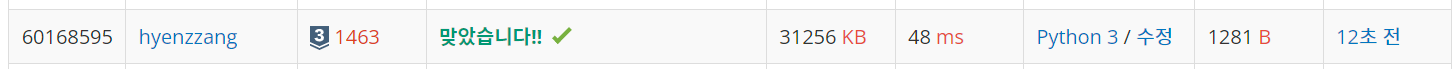

# 24. 가장 긴 증가하는 부분 수열
[문제 링크](https://www.acmicpc.net/problem/11053)

In [ ]:
n = int(input())
# 입력받은 수열을 리스트에 저장
l = list(map(int, input().split()))
# dp 테이블 초기화
# 그 수부터 시작하는 가장 긴 증가하는 부분 수열의 길이를 저장
dp = {}

def long_array(i):
    # 만약 dp 테이블에 값이 있다면 그 값을 리턴
    if dp.get(i) != None:
        return dp[i]
    # 만약 dp 테이블에 값이 없다면 1을 저장
    else:
        dp[i] = 1
        
    # 만약 dp 테이블에 값이 없다면 재귀함수를 이용해 값을 구한 후 dp 테이블에 저장
    for j in range(i+1, n):
        # 현재 값과 재귀후 나온 값+1중 최댓값을 저장
        if l[i] < l[j]:
            dp[i] = max(long_array(j) + 1, dp[i])
    
    # dp 테이블에 저장된 값을 리턴
    return dp[i]

# 모든 인덱스에 대하여 인덱스에서 시작하는 수열의 최댓값을 구함.
for i in range(n):
    long_array(i)
# dp 테이블에 저장된 값중 최댓값을 찾기 위해 정렬
result = sorted(dp.values(), key=lambda x:x, reverse=True)
# 출력
print(result[0])

## 성공
- dp와 재귀를 이용해 풀이.
- 모든 인덱스에 대하여 인덱스에서 시작하는 수열의 최댓값을 구함.
- 모두 구한 뒤, 정렬하여 가장 큰 값을 출력.

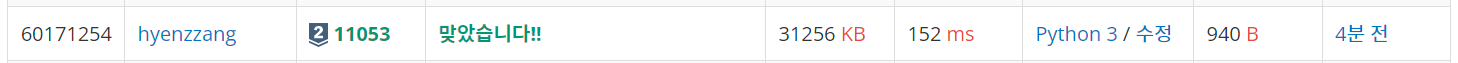

In [27]:
n = int(input())
# 입력받은 수열을 리스트에 저장
l = list(map(int, input().split()))
# dp 테이블 초기화
# 그 수부터 시작하는 가장 긴 증가하는 부분 수열의 길이를 저장
dp = {}

def long_array(i):
    # 만약 dp 테이블에 값이 있다면 그 값을 리턴
    if dp.get(i) != None:
        return dp[i]
    # 만약 dp 테이블에 값이 없다면 1을 저장
    else:
        dp[i] = 1
        
    # 만약 dp 테이블에 값이 없다면 재귀함수를 이용해 값을 구한 후 dp 테이블에 저장
    for j in range(i+1, n):
        # 현재 값과 재귀후 나온 값+1중 최댓값을 저장
        if l[i] < l[j]:
            dp[i] = max(long_array(j) + 1, dp[i])
    
    # dp 테이블에 저장된 값을 리턴
    return dp[i]
# 결과값 초기화
result = 1
# 모든 인덱스에 대하여 인덱스에서 시작하는 수열의 최댓값을 구함. -> 바로 비교하며 구함
for i in range(n):
    result = max(long_array(i), result)
# 출력
print(result)

4


## 성공
- 정렬을 피하고, 바로 값중 최댓값을 구하는 방식으로도 해봄.
- 오히려 시간이 아주 조금 늦어졌으나, 별 차이 없는듯.

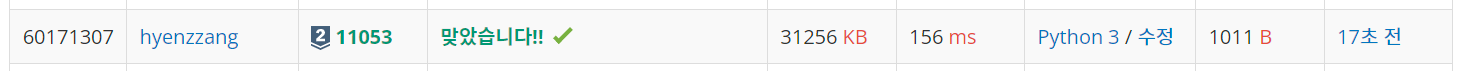